# Practice with Callbacks and off-axis geometry

Using `IsolatedGalaxy`, make the following plot:

![](figures/Callbacks_nice_slice.png)



This figure is an **off-axis slice** with the following features:
* a ray passing through the maximum density value of the dataset
* the off-axis slice is oriented such that the entirety of the ray lies within the slicing plane!
* ray start is indicated by the X marker, ray end is indicated by the open circle, both added with `annotate_marker`
* in-plane velocities are overlaid with `annotate_cquiver`
* temperature contours are overlaid with `annotate_contour`

In [30]:
import yt 
import numpy as np 
ds = yt.load_sample("IsolatedGalaxy")
field = ('gas', 'density')

yt : [INFO     ] 2025-07-14 10:06:05,599 Sample dataset found in '/home/chavlin/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2025-07-14 10:06:05,681 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2025-07-14 10:06:05,682 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-07-14 10:06:05,683 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-14 10:06:05,684 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-14 10:06:05,684 Parameters: cosmological_simulation   = 0


In [31]:
# find the maximum 
ad = ds.all_data()
max_val_location = ad.quantities.max_location(field)
max_val_location

Parsing Hierarchy : 100%|██████████████████| 173/173 [00:00<00:00, 13070.84it/s]
yt : [INFO     ] 2025-07-14 10:06:06,687 Gathering a field list (this may take a moment.)


[unyt_quantity(7.73426504e-24, 'g/cm**3'),
 unyt_quantity(0.50408936, 'code_length'),
 unyt_quantity(0.49981689, 'code_length'),
 unyt_quantity(0.50018311, 'code_length')]

In [32]:
location = ds.arr([max_val_location[indx] for indx in range(1,4)])
location

unyt_array([0.50408936, 0.49981689, 0.50018311], 'code_length')

In [33]:
# make a ray that passes through the max value and continues some distance

# the desired length of a ray
ray_length=ds.quan(0.25, 'code_length')


# let's orient the ray from the domain left edge to the center
ray_start = ds.domain_left_edge
ray_dir = (location - ray_start)
ray_dir = ray_dir / np.linalg.norm(ray_dir)

# and now update the ray start/end as a distance along the ray 
ray_start = location - ray_length * ray_dir
ray_end = location + ray_length * ray_dir

r = ds.ray(ray_start, ray_end)
r.start_point, r.end_point

(unyt_array([0.35896801, 0.35592554, 0.35618632], 'code_length'),
 unyt_array([0.6492107 , 0.64370825, 0.64417989], 'code_length'))

yt : [INFO     ] 2025-07-14 10:15:46,826 xlim = -0.249974 0.249974
yt : [INFO     ] 2025-07-14 10:15:46,827 ylim = -0.249974 0.249974
yt : [INFO     ] 2025-07-14 10:15:46,829 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2025-07-14 10:15:48,910 Saving plot figures/Callbacks_nice_slice.png



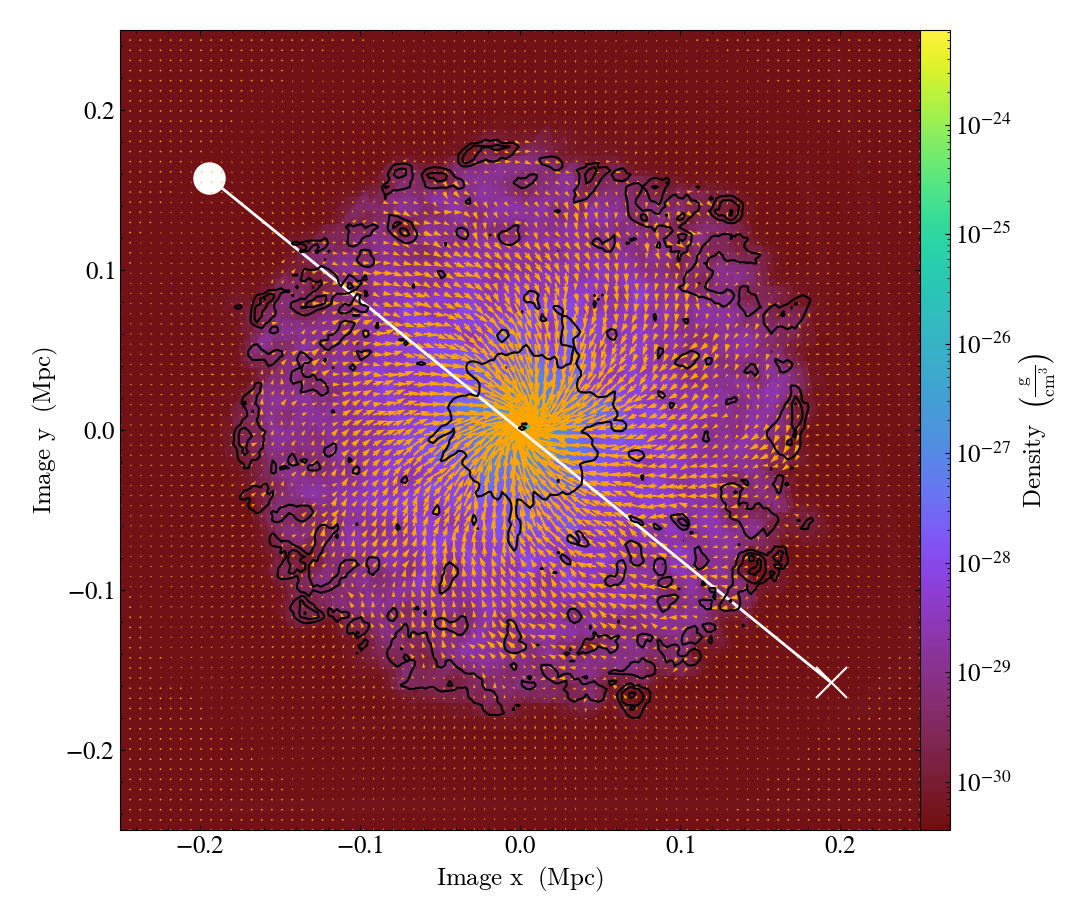

In [49]:
# now create an off-axis slice that contains the entirety of the ray: 
# construct any normal vector such that the ray lines in the plane

# set a dummy value, we'll keep the first two components 
# and then calculate the third
normal = ds.arr([1., 1., 1], 'code_length')
normal = normal / np.linalg.norm(normal)


# calculate the third component such that the dot product is 0 between the 
# ray direction and the normal that we way
normal[2] = - (ray_dir[0] * normal[0] + ray_dir[1] * normal[1]) / ray_dir[2]


slc = yt.SlicePlot(ds, normal, ('gas', 'density'), center=location, width=(.5, 'Mpc'))
slc.annotate_ray(r)
slc.annotate_contour(('gas', 'temperature'))
slc.annotate_marker(ray_start, color="white", s=500)
slc.annotate_marker(ray_end, marker="o", color="white", s=500)
slc.annotate_cquiver(
    ("gas", "cutting_plane_velocity_x"),
    ("gas", "cutting_plane_velocity_y"),
    factor=10,
    color="orange",
)
slc.save('figures/Callbacks_nice_slice.png')
slc.show()

For good measure, use a `yt.LinePlot` to plot both the density and temperature along the ray:

![](figures/Callbacks_den_prof.png)
![](figures/Callbacks_temp_prof.png)

yt : [INFO     ] 2025-07-14 10:12:16,616 Saving plot figures/Callbacks_den_prof.png
yt : [INFO     ] 2025-07-14 10:12:16,736 Saving plot figures/Callbacks_temp_prof.png



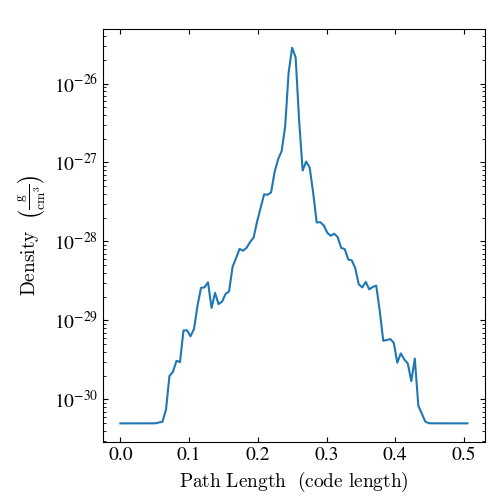
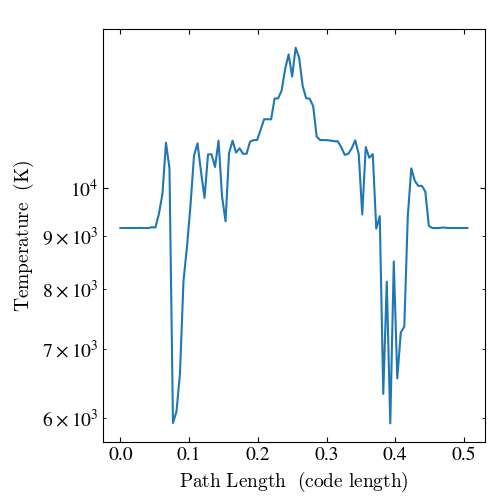

In [45]:
lp = yt.LinePlot(ds, [('gas', 'density'), ('gas', 'temperature')], r.start_point, r.end_point, 100)
lp[('gas', 'density')].save('figures/Callbacks_den_prof.png')
lp[('gas', 'temperature')].save('figures/Callbacks_temp_prof.png')
lp.show()